
# <center> Логістична регресія (Logistic regression) <center>

<a href='#part0' style="color:#75736f; text-decoration:none;"> Import libraries <a>
    
<a href='#part1' style="color:#75736f; text-decoration:none;"> Модель без предикторів. Intercept only model <a>
    
<a href='#part2' style="color:#75736f; text-decoration:none;"> Модель з одним номінативним предиктором <a>
    
<a href='#part2.5' style="color:#75736f; text-decoration:none; margin-left:10em;"> Розрахунок середньоефективної (середньолетальної) дози <a>  
    
<a href='#part3' style="color:#75736f; text-decoration:none;"> Модель із двома номінативними предикторами <a>

<a href='#part4' style="color:#75736f; text-decoration:none;"> Прогнозування моделі <a>

[Логістична регресія](https://uk.wikipedia.org/wiki/Логістична_регресія) (англ. logistic regression) або лоґіт-регресія (англ. logit model) — статистичний регресійний метод, що застосовують у випадку, коли залежна змінна є бінарною, тобто може набувати тільки двох значень (0 або 1). При запровадженні порогового значення може знаходити застосування у класифікуванні.

[Імові́рність (**p**)](https://uk.wikipedia.org/wiki/Імовірність) (лат. probabilitas, англ. probability) — числова характеристика можливості того, що випадкова подія відбудеться в умовах, які можуть бути відтворені необмежену кількість разів. Це ступінь (відносна міра, кількісна оцінка) можливості настання деякої події.

Неможлива подія має ймовірність 0 (назад взагалі кажучи не завжди вірно). Якщо ймовірність настання події дорівнює $\displaystyle p$, то ймовірність його ненастання (а також неймовірність настання) дорівнює $\displaystyle 1-p$. Зокрема, ймовірність $\displaystyle 1/2$ означає рівну ймовірність настання та ненастання події.

Шанси (англ. **odds**) забезпечують міру ймовірності конкретного результату. Вони розраховуються як відношення кількості подій, що призводять до цього результату, до кількості подій, що не призводять до такого результату.

Шанси також мають простий зв'язок з ймовірністю: шанси результату є відношенням ймовірності того, що результат відбудеться, до ймовірності того, що результат не відбудеться. З точки зору математики, де ймовірність результату:

$$\displaystyle {\text {odds}} = {\frac {p} {1-p}}$$

де $1-р$ - ймовірність того, що результат не настане.

Відношення імовірності до шансів:
<a id='part0'></a>

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import display, HTML


C:\Users\GbreH\AppData\Local\Temp\ipykernel_11920\3957056945.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


C:\Users\GbreH\AppData\Local\Temp\ipykernel_11920\214601321.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  odds = lambda p: p/(1-p)


(-2.5, 2.5)

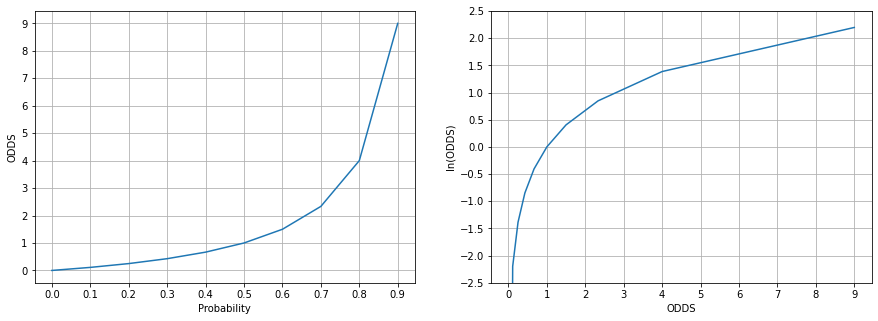

In [116]:
probability = np.arange(0,1.1,0.1) # значення від 0 до 1 с кроком 0.1
odds = lambda p: p/(1-p)
ODDS = list(map(odds, probability)) # шанси від 0 до 10 (= 1/0.1)


fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
ax = axs[0]
axis = axs[1]
ax.plot(probability, ODDS)
ax.grid(True)
ax.locator_params ('x', nbins = 10)
ax.locator_params ('y', nbins = 10)
ax.set_xlabel('Probability')
ax.set_ylabel('ODDS')
ODDS[0] = 0.0000001
ln = lambda x: math.log(x)
ln_ODDS = list(map(ln, ODDS))
axis.plot(ODDS, ln_ODDS)
axis.grid(True)
axis.locator_params ('x', nbins = 10)
axis.locator_params ('y', nbins = 10)
axis.set_xlabel('ODDS')
axis.set_ylabel('ln(ODDS)')
# axis.axhline(y=0, lw=5, color='k')
# axis.axvline(x=0, lw=5, color='k')
axis.set_ylim(-2.5, 2.5)

На графіках видно, що зі збільшенням імовірності збільшуються шанси, а в випадку логарифма (натурального) при значенні 0 шанси рівні odds=1 та зростають

В логістичній регресійній моделі Залежна Перемінна відповідає логарифму шансів, а коефіцієнт(и) це відношення логарифмів шасу(ів)

Розглянемо на прикладі вижавання при кораблекрушінні Титаніку

<a id='part1'></a>
# Модель без предикторів. Intercept only model

In [117]:
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
df.head(3) # Survived - вказує на виживання пасажиру 1 -вижив, 0-загинув

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [118]:
survivors = df.query('Survived==1').Survived.count() # Out 342
deаd = df.query('Survived==0').Survived.count() # Out 549
odds = survivors/deаd # Out 0.6229508196721312
p = survivors/(survivors+deаd) # Out 0.3838383838383838
ln_odds = math.log(odds) # Out: -0.4732877044469254 Intercept натуральний логарифм шансів вижити
p = np.exp(ln_odds) / (1 + np.exp(ln_odds)) # Out 0.3838383838383838 # p = 1/(1+math.e**(ln_odds*-1))

In [119]:
#probability = lambda ln_odds: np.exp(ln_odds) / (1 + np.exp(ln_odds))
def probability(ln_odds):
    return 1/(1+math.e**(ln_odds*-1))

In [120]:
glm_binom_only_model = smf.glm(formula="Survived ~ 1", data=df, family=sm.families.Binomial())
intercept_only_model = glm_binom_only_model.fit()
intercept_only_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      890
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -593.33
Date:                Sun, 14 Aug 2022   Deviance:                       1186.7
Time:                        15:37:32   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4733      0.069     -6.870      0.000      -0.608      -0.338
==============================================================================
"""

<a id='part2'></a>
# Модель з одним номінативним предиктором

In [121]:
glm_binom_one_predictor = smf.glm(formula="Survived ~ C(Sex)", data=df, family=sm.families.Binomial())
model_one_predictor = glm_binom_one_predictor.fit()
model_one_predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Sun, 14 Aug 2022   Deviance:                       917.80
Time:                        15:37:32   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0566      0.129      8.191      0.000       0.804       1.309
C(Sex)[T.male]    -2.5137      0.167    -15.036      0.000      -2.841      -2.186
==================================================================================
"""

Може залишитися законне питання: навіщо так ускладнювати? Чому значення коефіцієнтів при номінативних змінних – це логарифм відношення шансів, тобто логарифм дробу? Тут нам на допомогу прийде властивість логарифмів.

Рівняння регресії може бути записано таким чином:

$$\ln(odds) = Intercept + b_{1}*SexMale$$


Значення **intercept** – це логарифм шансів вижити для жінок:  

 $$Intercept=\ln(\frac{P_{survive}}{1 - P_{survive}})=\ln(odds_{female})$$


Значення коефіцієнта при **SexMale** - це логарифм відношення шансів вижити для чоловіків і шансів вижити для жінок, але за властивістю логарифмів ми можемо уявити логарифм відношення як різницю логарифмів:

$$b_{1}=\ln(\frac{odds_{male}}{odds_{female}}) =\ln(odds_{male}) - \ln(odds_{female})$$


Таким чином, коефіцієнт при **SexMale** – це різниця логарифмів шансів. Іншими словами, це ціна переходу з однієї градації нашої ознаки на іншу!

Давайте ще раз розглянемо завдання передбачення. Якщо новий пасажир - жінка, тоді значення змінної **SexMale** = 0 і ми отримаємо логарифм шансів для жінок:

$$\ln(odds_{female}) = \ln(odds_{female}) + 0*(\ln(odds_{male}) - \ln(odds_{female})) = \ln(odds_
{female})$$

Тепер, зробимо прогноз для пасажира чоловіка, у цьому випадку **SexMale** = 1, шанси для жінок скоротяться, і ми отримаємо шанси для чоловіків:

$$\ln(odds_{male}) = \ln(odds_{female}) + 1*(\ln(odds_{male}) - \ln(odds_{female}))\\\hspace{55pt}= \ln(odds_{female}) +\ln(odds_{male}) - \ln(odds_{female})\\\hspace{55pt}= \ln(odds_{male})$$


In [122]:
survive = pd.crosstab(df.Survived, df.Sex)
survive

Sex,female,male
Survived,,
0,81,468
1,233,109


In [123]:
odds_male = survive['male'][1]/survive['male'][0]
odds_female = survive['female'][1] / survive['female'][0]

ln_odds_male = np.log(odds_male) # ln(109 / 468)
ln_odds_female = np.log(odds_female) # intercept = ln(233 / 81)
odds_ratio = np.log(odds_male / odds_female) # coef_

data = pd.DataFrame(index=['odds male', 'odds female', 'odds male/odds female'], columns=['Ln', 'coef'])
data['Ln']['odds male'] = ln_odds_male
data['Ln']['odds female'] = ln_odds_female
data['Ln']['odds male/odds female'] = odds_ratio
data['coef']['odds female'] = 'Intercept'
data['coef']['odds male/odds female'] = 'C(Sex)[T.male]'
data['coef']['odds male']= 'C(Sex)[T.male] - Intercept'
data

,Ln,coef
odds male,-1.45712,C(Sex)[T.male] - Intercept
odds female,1.056589,Intercept
odds male/odds female,-2.51371,C(Sex)[T.male]


<a id='part2.5'></a>
# Розрахунок середньоефективної (середньолетальної) дози

In [124]:
# Підготовка даних

dose = [38,40,40,40,42,42,42,44,44,44,47,47,47] # певна температура дії на комах
alive = [20,20,20,20,19,14,15,5,3,2,0,0,0] # кількість виживших комах за умов дії певної температури
dead = [0,0,0,0,1,6,5,15,17,18,20,20,20] # кількість загинувших комах за умов дії певної температури

def get_dataframe(dose, alive, dead):
    data_for_df = []
    for i, j in zip(dose, alive):
        for n in range(j):
            data_for_df.append((i,1))
    for i, j in zip(dose, dead):
        for n in range(j):
            data_for_df.append((i,0))  
    df = pd.DataFrame(columns=['dose', 'Survived'])
    df[['dose', 'Survived']] = data_for_df
    return df

ld = get_dataframe(dose, alive, dead)

In [125]:
# будуємо логіт-модель виживаємості від дози
model = smf.glm(formula="Survived ~ dose", data=ld, family=sm.families.Binomial())
result = model.fit()
result.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,69.1126,9.019,7.663,0.000,51.436,86.789
dose,-1.6094,0.210,-7.653,0.000,-2.022,-1.197


[Розрахуємо](https://bookdown.org/dereksonderegger/571/11-binomial-regression.html#prediction-and-effective-dose-levels) дозу(температуру) виживаємості у 50% ($р=0.5$) комах

$$x_p = \frac{logit(p)-\beta_{0}}{\beta_{1}}=\frac{logit(p)-Intercept}{coef_{dose}}$$
$$dose_{0.5} = \frac{ln(\frac{0.5}{1-0.5})-69.1126}{-1.6094} = 42.943$$


```Python
dose = (np.log(0.5/(1-0.5))-69.1126)/-1.6094 # Out: 42.94308437927178
```

Так як виживаємість при $р=0.5$ відповідає смертності то $LD_{50}$ (Dosis letalis of a tested 50% population), то $LD_{50} = 42.94$

Для мови програмування R є бібліотека "MASS", в якій функція [$dose.p$](https://github.com/cran/MASS/blob/master/R/dose.p.R) розрахову частку від дози за заданою ймовірністю. Реалізуємо її на python:

In [126]:
def dose_p(model_fit, p=0.5):
    logit = lambda p: np.log(p/(1-p))
    # https://bookdown.org/dereksonderegger/571/11-binomial-regression.html#prediction-and-effective-dose-levels
    dose = (logit(p)-result.params.Intercept)/result.params['dose']
    # https://stats.stackexchange.com/questions/483362/pointwise-standard-errors-for-a-logistic-regression-fit-with-statsmodels
    C = model_fit.normalized_cov_params
    L_T = np.array([1/result.params['dose'], dose/result.params['dose']])
    L_T = np.matrix(L_T)
    L = np.transpose(L_T)
    C = np.matrix(C)
    var_f = np.matmul(np.matmul(L_T, C), L)
    var_f = np.asarray(var_f)[0][0]
    pointwise_se = np.sqrt(var_f) 
    return dose, pointwise_se

In [127]:
result.predict({'dose':38}) # при 38 градусами не загинуло жодної комахи p = 0.999649
result.predict({'dose':47}) # при 47 градусами загинули всі комахи p = 0.001455

0    0.001455
dtype: float64

In [128]:
P_ld = [0.999649, 0.84, 0.5, 0.16, 0.001455] # задамо перелік вірогідностей для яких розрахуємо дози
for p in P_ld:
    dose, SE = dose_p(result, p)
    print(f'LD {int((1-p)*100)} : {dose=}, {SE=}') # 1-p так як розраховуємо ймовірність загинути

LD 0 : dose=37.99962494180197, SE=0.6534979205851655
LD 16 : dose=41.911625562766844, SE=0.19481776686450214
LD 50 : dose=42.941936818804464, SE=0.14973243803577288
LD 84 : dose=43.97224807484208, SE=0.2076925424635493
LD 99 : dose=47.000042647433894, SE=0.5601892131158194


C:\Users\GbreH\AppData\Local\Temp\ipykernel_11920\1177815527.py:6: RuntimeWarning: divide by zero encountered in log
  f = lambda x: (np.log(x/(1-x))-69.1126)/-1.6094
C:\Users\GbreH\AppData\Local\Temp\ipykernel_11920\1177815527.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: (np.log(x/(1-x))-69.1126)/-1.6094


Text(41, 0.02, '$LD_{84} = 43.97 \\pm 0.2077$')

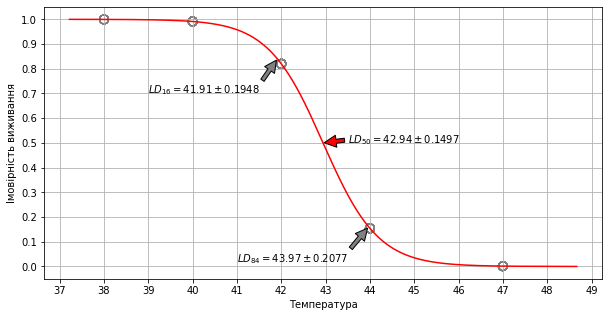

In [129]:
fig, ax = plt.subplots(figsize=(10,5))

_y = result.predict(ld['dose'])
ax.scatter(ld['dose'], _y, s=80, facecolors='none', edgecolors='grey') # plt.plot(df['dose'], _y, 'o', mfc='none', color='grey')

f = lambda x: (np.log(x/(1-x))-69.1126)/-1.6094
y = np.linspace(0,1,10000)
x = list(map(f,y))
ax.plot(x,y, color='r')

ax.grid(True)
ax.locator_params('y', nbins=20)
ax.locator_params('x', nbins=20)
ax.set_xlabel('Температура')
ax.set_ylabel('Імовірність виживання')

ax.annotate(r"$LD_{50} = 42.94 \pm 0.1497$",
                xy=(42.94, 0.5), xytext=(43.5, 0.5),
                arrowprops=dict(facecolor="red", shrink=0.05))
ax.annotate(r"$LD_{16} = 41.91 \pm 0.1948$",
                xy=(41.91, 0.84), xytext=(39, 0.7),
                arrowprops=dict(facecolor="grey", shrink=0.05))
ax.annotate(r"$LD_{84} = 43.97 \pm 0.2077$",
                xy=(43.97, 0.16), xytext=(41, 0.02),
                arrowprops=dict(facecolor="grey", shrink=0.05))

<a id='part3'></a>
# Модель із двома номінативними предикторами

In [130]:
glm_binom_two_predictor = smf.glm(formula="Survived ~ Sex * C(Pclass)", data=df, family=sm.families.Binomial())
model_two_predictor = glm_binom_two_predictor.fit()
model_two_predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -399.05
Date:                Sun, 14 Aug 2022   Deviance:                       798.10
Time:                        15:37:33   Pearson chi2:                     891.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3534
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.4122      0.587      5.815      0.000       2.262       4.562
Sex[T.male]                   -3.9494      0.616     -6.411      0.000      -5.157      -2.742
C(Pclass)[T.2]                -0.9555      0.725     -1.318      0.187      -2.376       0.465
C(Pclass)[T.3]                -3.4122      0.610     -5.594      0.000      -4.608      -2.217
Sex[T.male]:C(Pclass)[T.2]    -0.1850      0.794     -0.233      0.816      -1.741       1.371
Sex[T.male]:C(Pclass)[T.3]     2.0958      0.657      3.189      0.001       0.808       3.384
==============================================================================================
"""

$Intercept$ - жінки в першому класі (так як $C(Pclass)$ не має значення $[T.1]$ в зображеній моделі)

In [131]:
# Розподіл виживших та загинувших жінок в 1,2 та 3 класах
survive_female = pd.crosstab(df.query('Sex=="female"').Survived, df.Pclass)
survive_female

Pclass,1,2,3
Survived,,,
0,3,6,72
1,91,70,72


In [132]:
odds_female_1class = survive_female[1][1]/survive_female[1][0] # Out: 30.333 шанс вижити жінкам в 1 класі
𝐼𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡 = np.log(odds_female_1class) # Out: 3.41224721784874

In [133]:
# Розподіл виживших та загинувших чоловіків в 1,2 та 3 класах
survive_male = pd.crosstab(df.query('Sex=="male"').Survived, df.Pclass)
survive_male

Pclass,1,2,3
Survived,,,
0,77,91,300
1,45,17,47


In [134]:
# Допоміжні розрахунки: шанси вижити для чоловіків в 1,2 та 3 класах
odds_male_1class = survive_male[1][1]/survive_male[1][0] # Out: 0.5844155844155844
odds_male_2class = survive_male[2][1]/survive_male[2][0] # Out: 0.18681318681318682
odds_male_3class = survive_male[3][1]/survive_male[3][0] # Out: 0.15666666666666668

# Допоміжні розрахунки: шанси вижити для жінок в 1,2 та 3 класах
odds_female_1class = survive_female[1][1]/survive_female[1][0] # Out: 30.333333333333332
odds_female_2class = survive_female[2][1]/survive_female[2][0] # Out: 11.666666666666666
odds_female_3class = survive_female[3][1]/survive_female[3][0] # Out: 1

# Sex[T.male] - значення відношення шансів вижити чоловікам в 1 класі до виживання  жінок в 1 класі 
# натуральний логарифм шансу вижити чоловікам в 1 класі
ln_odds_male_1class = np.log(odds_male_1class) # Out: -0.5371429320833642
SexT_male = ln_odds_male_1class - Intercept # Out: -3.9493901499321042

# C(Pclass)[T.2] - значення відношення шансів  вижити жінкам в 2 класі до виживання  жінок в 1 класі
ln_odds_female_2class = np.log(odds_female_2class) # Out: -1.677646162460634
PclassT_2 = ln_odds_female_2class - Intercept # Out: -0.9555114450274362

# C(Pclass)[T.3] - значення відношення шансів вижити жінкам в 3 класі до виживання  жінок в 1 класі
ln_odds_female_3class = np.log(odds_female_3class) # Out: 0
PclassT_3 = ln_odds_female_3class - Intercept # Out: -3.41224721784874

# Sex[T.male]:C(Pclass)[T.2] - значення відношення шансів вижити чоловікам до виживання  жінок в 2 класі між 1 класом
# відношення шансів для чоловіків та жінок 2 та 1 класу
class_2_male_female = odds_male_2class/odds_female_2class # Out: 0.016012558869701727
class_1_male_female = odds_male_1class/odds_female_1class # Out: 0.01926644783787641
Sex_male_Pclass_2 = np.log(class_2_male_female) - np.log(class_1_male_female) # Out: -0.1849917853498333

# Sex[T.male]:C(Pclass)[T.3] - Натуральний логарифм відношення шансів вижити чоловікам до виживання  жінок в 3 класі між 1 класом
class_3_male_female = odds_male_3class/odds_female_3class
Sex_male_Pclass_3 = np.log(class_3_male_female) - np.log(class_1_male_female) # Out: 2.0957552769859618

In [135]:
data = pd.DataFrame(index=[ '𝐼𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡', 'Sex[T.male]','C(Pclass)[T.2]','C(Pclass)[T.3]',
                           'Sex[T.male]:C(Pclass)[T.2]', 'Sex[T.male]:C(Pclass)[T.3]'], 
                    columns=['Value', 'calulate'])
data['Value']['𝐼𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡'] = Intercept
data['Value']['Sex[T.male]'] = SexT_male
data['Value']['C(Pclass)[T.2]'] = PclassT_2
data['Value']['C(Pclass)[T.3]'] = PclassT_3
data['Value']['Sex[T.male]:C(Pclass)[T.2]'] = Sex_male_Pclass_2
data['Value']['Sex[T.male]:C(Pclass)[T.3]'] = Sex_male_Pclass_3
data['calulate']['𝐼𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡'] = 'Натуральний логарифм шансів вижити жінкам 1 класу '
data['calulate']['Sex[T.male]'] = 'Натуральний логарифм відношення шансів вижити чоловікам в 1 класі до виживання  жінок в 1 класі'
data['calulate']['C(Pclass)[T.2]'] = 'Натуральний логарифм відношення шансів  вижити жінкам в 2 класі до виживання  жінок в 1 класі'
data['calulate']['C(Pclass)[T.3]'] = 'Натуральний логарифм відношення шансів вижити жінкам в 3 класі до виживання  жінок в 1 класі'
data['calulate']['Sex[T.male]:C(Pclass)[T.2]'] = 'Натуральний логарифм відношення шансів вижити чоловікам до виживання  жінок в 2 класі між 1 класом'
data['calulate']['Sex[T.male]:C(Pclass)[T.3]'] = 'Натуральний логарифм відношення шансів вижити чоловікам до виживання  жінок в 3 класі між 1 класом'

display(HTML(data.to_html()))

,Value,calulate
𝐼𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡,3.412247,Натуральний логарифм шансів вижити жінкам 1 класу
Sex[T.male],-3.94939,Натуральний логарифм відношення шансів вижити чоловікам в 1 класі до виживання жінок в 1 класі
C(Pclass)[T.2],-0.955511,Натуральний логарифм відношення шансів вижити жінкам в 2 класі до виживання жінок в 1 класі
C(Pclass)[T.3],-3.412247,Натуральний логарифм відношення шансів вижити жінкам в 3 класі до виживання жінок в 1 класі
Sex[T.male]:C(Pclass)[T.2],-0.184992,Натуральний логарифм відношення шансів вижити чоловікам до виживання жінок в 2 класі між 1 класом
Sex[T.male]:C(Pclass)[T.3],2.095755,Натуральний логарифм відношення шансів вижити чоловікам до виживання жінок в 3 класі між 1 класом


In [136]:
model_two_predictor.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.4122,0.587,5.815,0.000,2.262,4.562
Sex[T.male],-3.9494,0.616,-6.411,0.000,-5.157,-2.742
C(Pclass)[T.2],-0.9555,0.725,-1.318,0.187,-2.376,0.465
C(Pclass)[T.3],-3.4122,0.610,-5.594,0.000,-4.608,-2.217
Sex[T.male]:C(Pclass)[T.2],-0.1850,0.794,-0.233,0.816,-1.741,1.371
Sex[T.male]:C(Pclass)[T.3],2.0958,0.657,3.189,0.001,0.808,3.384


**Intercept** – логарифм шансів позитивного результату для жінок у першому класі.

**SexMale** - логарифм відношення шансів для чоловіків у першому класі та жінок у першому класі.

**PclassSecond** - логарифм відношення шансів для жінок у другому класі та жінок у першому класі.

**PclassThird** - логарифм відношення шансів для жінок у третьому класі та жінок у першому класі.

**SexMale:PclassSecond** — різниця логарифмів відношення шансів, розрахованого для чоловіків та жінок у першому класі та у другому класі.

**SexMale:PclassThird** - різниця логарифмів відношення шансів розрахованого для чоловіків і жінок у першому та третьому класі.

Так що ж впливає на виживаємість? Поглянувши на значення колонки $P>|z|$ видно, що відмінностей між шансами вижити жінкам в 2 класі до виживання жінок в 1 класі не має. Так як і  шансів вижити чоловікам до виживання жінок в 2 класі між 1 класом теж не має. А ось відношення шансів вижити чоловікам в 1 класі до виживання жінок в 1 класі статистично значимі, як і у випадку  відношення шансів вижити жінкам в 3 класі до виживання жінок в 1 класі

<a id='part4'></a>
# Прогнозування моделі

Тепер спробуємо спрогнозувати виживаємість пасажирів на основі нашої навченої логістичної моделі:


In [137]:
model_two_predictor.predict({'Sex':'male', 'Pclass':3}) # вірогідність вижити чоловікам з 3 класу = 0.135447
model_two_predictor.predict({'Sex':'female', 'Pclass':3}) # вірогідність вижити жінкам з 3 класу = 0.5
model_two_predictor.predict({'Sex':'female', 'Pclass':1}) # вірогідність вижити жінкам з 1 класу = 0.968085
model_two_predictor.predict({'Sex':'male', 'Pclass':1}) # вірогідність вижити чоловікам з 1 класу = 0.368852
model_two_predictor.predict({'Sex':'female', 'Pclass':2}) # вірогідність вижити жінкам з 2 класу = 0.921053
model_two_predictor.predict({'Sex':'male', 'Pclass':2}) # вірогідність вижити чоловікам з 2 класу = 0.157407

0    0.157407
dtype: float64

Показник | Код |Значення|
---------|------|------------------------------------------------
Sex_male  |0 |пасажир жіночої статі
          |1 |пасажир чоловічої статі
Pclass_2 |0 |пасажир 1 або 3 класу
            |1 |пасажир 2 класу
Pclass_3 |0 |пасажир 1 або 2 класу
           |1 |пасажир 3 класу
Sex_male:Pclass_2 |0 |пасажир 1 або 3 класу або пасажирка 2 класу
             |1 |пасажир 2 класи чоловічої статі
Sex_male:Pclass_3 |0 |пасажир 1 або 2 класу або пасажирка 3 класу
             |1 |пасажир 3 класи чоловічої статі

показники     |intercept|Sex_male|Pclass_2|Pclass_3|Sex_male:Pclass_2|Sex_male:Pclass_3|
--------------|:-------:|:------:|:------:|:------:|:---------------:|:---------------:|
модель f(x)     |$$3.4122$$|$$- 3.9494x $$|$$- 0.9555x$$|$$- 3.4122x$$|$$- 0.1850x$$|$$+ 2.0958x$$|

$$logit_{\text{(P чоловіки 1 класу)}} = 3.4122 - 3.9494*1 - 0.9555*0 - 3.4122*0 - 0.1850*0 + 2.0958*0 = -0.5372$$

$$P_{\text{чоловіки 1 класу}} = \frac{1}{1+e^{-logit_{\text{(P чоловіки 1 класу)}}}} = \frac{1}{1+e^{0.5372}} = 0.3688$$



In [138]:
def logit(p):
    return np.log(p/(1-p))

def invlogit(x):
    # inverse function of logit
    return 1/(1+np.exp(-x))

invlogit(3.4122 - 3.9494*1 - 0.9555*0 - 3.4122*1 - 0.1850*0 + 2.0958*1)# чоловіки 3 класу

0.13545076958360053

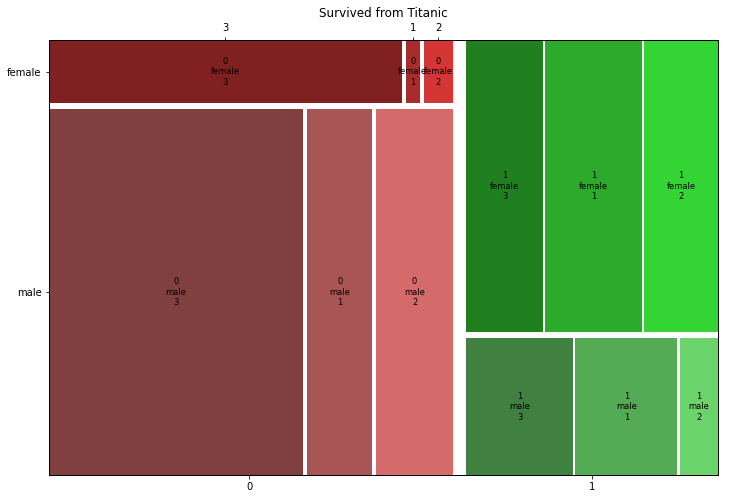

In [139]:
plt.rcParams['figure.figsize']=(12, 8) # встановили розмір
mosaic(df, ['Survived', 'Sex', 'Pclass'], gap = 0.02, title='Survived from Titanic')
plt.show()